# 回归分析

回归分析是确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法，通常分为两种情况：线性回归分析和非线性回归分析

### 一.线性回归分析
线性回归分析中只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为一元线性回归分析。如果回归分析包括中两个或两个以上的自变量且因变量和自变量之间是线性关系，则称为多元线性回归分析
#### 一元线性回归

假设已知xoy二维平面上N个点组成的点集{(x^(i),y^(i)}∈RXR，i=1,2,3...,N，求一条直线y=wx+b，使得这些点沿y方向到直线的距离的平方和(即损失函数)最小

已知xoy平面上6个点(1,3),(2,4),(3,7),(4,8),(5,11)和(6,14)，寻找一条直线y=wx+b

直线的斜率w和截距b是要求解的未知量，在对应的代码实现中将这两个未知量分别初始化为两个Variable对象，而损失函数可以用函数square和reduce_sum实现，然后构造的损失函数利用梯度下降函数GradientDescentOptimizer计算w和b

(1.91, 1.2)
(2.0550959, 0.75369716)
(2.1164339, 0.49109679)
(2.1518073, 0.3396554)
(2.1722074, 0.2523191)
(2.1839721, 0.20195228)
(2.1907568, 0.17290573)
(2.1946695, 0.15615471)
(2.1969259, 0.14649433)
(2.1982272, 0.14092326)


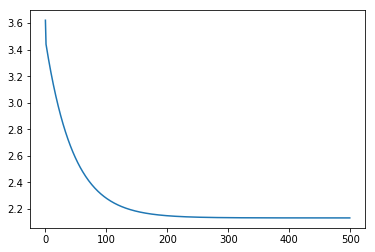

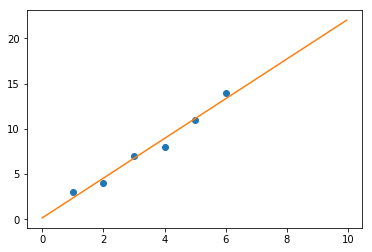

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x=tf.constant([1,2,3,4,5,6],tf.float32)
y=tf.constant([3,4,7,8,11,14],tf.float32)

w=tf.Variable(1.0,dtype=tf.float32)

b=tf.Variable(1.0,dtype=tf.float32)

loss=tf.reduce_sum(tf.square(y-(w*x+b)))

session=tf.Session()
session.run(tf.global_variables_initializer())

opti=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

MSE=[]

for i in range(500):
    session.run(opti)
    
    MSE.append(session.run(loss))
    
    if i%50==0:
        print((session.run(w),session.run(b)))
        
plt.figure(1)
plt.plot(MSE)
plt.show()

plt.figure(2)
x_array,y_array=session.run([x,y])
plt.plot(x_array,y_array,"o")

xx=np.arange(0,10,0.05)

yy=session.run(w)*xx+session.run(b)

plt.plot(xx,yy)
plt.show()

#### 保存和加载回归模型
Tensorflow保存计算模型，可以简单地理解为用文件保存程序中的Variable对象

注意：使用方法save时，一定要设置文件的保存路径，否则会报错

In [10]:
import tensorflow as tf

v1=tf.Variable(tf.constant([1,2,3],tf.float32),dtype=tf.float32,name="v1")
v2=tf.Variable(tf.constant([4,5],tf.float32),dtype=tf.float32,name="v2")

saver=tf.train.Saver()

session=tf.Session()

session.run(tf.global_variables_initializer())

save_path=saver.save(session,"./model.ckpt")

session.close()

调用的不再是方法save，而是对应的该类中的方法restore

In [12]:
import tensorflow as tf

v1=tf.Variable(tf.constant([11,12,13],tf.float32),dtype=tf.float32,name="v1")
v1=tf.Variable(tf.constant([15,16],tf.float32),dtype=tf.float32,name="v2")

saver=tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess,"./model.ckpt")
    
    print(sess.run(v1))
    print(sess.run(v2))
    
    sess.close()

INFO:tensorflow:Restoring parameters from ./model.ckpt


NotFoundError: Key v2_7 not found in checkpoint
	 [[Node: save_7/RestoreV2_21 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_7/Const_0_0, save_7/RestoreV2_21/tensor_names, save_7/RestoreV2_21/shape_and_slices)]]

Caused by op 'save_7/RestoreV2_21', defined at:
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-3bc190b439ef>", line 6, in <module>
    saver=tf.train.Saver()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1139, in __init__
    self.build()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key v2_7 not found in checkpoint
	 [[Node: save_7/RestoreV2_21 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_7/Const_0_0, save_7/RestoreV2_21/tensor_names, save_7/RestoreV2_21/shape_and_slices)]]


通过另一种方式，直接获得文件中的变量的名称及其对应的值

In [ ]:
import tensorflow as tf
print(tf.__version__)


TypeError: must be str, not NoneType

In [5]:
import tensorflow as tf
from tensorflow.python import pywrap_tensorflow

ckpt=tf.train.latest_checkpoint('./')

print("获取的ckpt文件："+ckpt)

reader=pywrap_tensorflow.NewCheckpointReader(ckpt)

var_to_shape_map=reader.get_variable_to_shape_map()

for key in var_to_shape_map:
    print("tensor_name:",key)
    print(reader.get_tensor(key))

TypeError: must be str, not NoneType

#### 多元线性回归
接下来将一元线性回归推广到多元线性回归，并介绍用Tensorflow处理回归问题的完整过程
1.训练多元线性回归模型，并保存模型
2.加载多元回归模型，并进行预测

假设xyz三维空间中有6个点：(1,1,8),(2,1,12),(3,2,10),(1,2,14),(4,5,28)和(5,8,10)，寻找一个超平面z=f(x,y)=w1*x+w2*y+b使得这些点到超平面(沿z轴方向)的距离和(即损失函数)最小

第一个步骤：训练并保存模型

-----第0次的迭代值-----
[array([[ 1.95000005],
       [ 1.99000001]], dtype=float32), 1.41]


-----第100次的迭代值-----
[array([[ 2.93880343],
       [-0.6417622 ]], dtype=float32), 7.5024066]


-----第200次的迭代值-----
[array([[ 2.1817584 ],
       [-0.35411417]], dtype=float32), 8.8399611]


-----第300次的迭代值-----
[array([[ 1.87159467],
       [-0.22765213]], dtype=float32), 9.3462343]


-----第400次的迭代值-----
[array([[ 1.75086105],
       [-0.1783222 ]], dtype=float32), 9.5428028]
-----第500次的迭代值-----
[array([[ 1.70422506],
       [-0.1592657 ]], dtype=float32), 9.6187239]


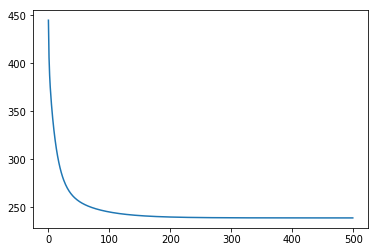

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

xy=tf.placeholder(tf.float32,[None,2])
z=tf.placeholder(tf.float32,[None,1])

w=tf.Variable(tf.constant([[1],[1]],tf.float32),dtype=tf.float32)
b=tf.Variable(1.0,dtype=tf.float32)

loss=tf.reduce_sum(tf.square(z-(tf.matmul(xy,w)+b)))

session=tf.Session()
session.run(tf.global_variables_initializer())

opti=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# 记录每一次迭代后的平均平方误差(Mean Squared Error)
MSE=[]

# 训练数据
xy_train=np.array(
    [
        [1,1],
        [2,1],
        [3,2],
        [1,2],
        [4,5],
        [5,8]
    ]
    ,np.float32
)

z_train=np.array(
    [
        [8],
        [12],
        [10],
        [14],
        [28],
        [10]
    ]
    ,np.float32
)

saver=tf.train.Saver()

for i in range(500):
    session.run(opti,feed_dict={xy:xy_train,z:z_train})
    
    MSE.append(session.run(loss,feed_dict={xy:xy_train,z:z_train}))
    
    if i%100==0:
        saver.save(session,"./model/eryuanmodel.ckpt",global_step=i)
        print("-----第"+str(i)+"次的迭代值-----")
        print(session.run([w,b]))
        
print("-----第"+str(500)+"次的迭代值-----")
print(session.run([w,b]))

saver.save(session,"./model/eryuanmodel.ckpt",global_step=i)

plt.figure(1)
plt.plot(MSE)
plt.show()


方法2：加载多元回归模型，并进行预测

In [8]:
import tensorflow as tf
import numpy as np

xy=tf.placeholder(tf.float32,[None,2])

w=tf.Variable(tf.constant([[1],[1]],tf.float32),dtype=tf.float32,name="w")
b=tf.Variable(1.0,dtype=tf.float32,name="b")

z=tf.matmul(xy,w)+b
saver=tf.train.Saver()

ckpt=tf.train.latest_checkpoint("./model")

print("获得的ckpt文件："+ckpt)

session=tf.Session()

saver.restore(session,ckpt)

pred=session.run(z,feed_dict={xy:np.array([[6,7],[8,10]],np.float32)})
print("在坐标(6,7)和(8,10)处的值：")
print(pred)

获得的ckpt文件：./model\eryuanmodel.ckpt-499
INFO:tensorflow:Restoring parameters from ./model\eryuanmodel.ckpt-499


NotFoundError: Key w not found in checkpoint
	 [[Node: save_2/RestoreV2_5 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_5/tensor_names, save_2/RestoreV2_5/shape_and_slices)]]

Caused by op 'save_2/RestoreV2_5', defined at:
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-846c4f846149>", line 10, in <module>
    saver=tf.train.Saver()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1139, in __init__
    self.build()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key w not found in checkpoint
	 [[Node: save_2/RestoreV2_5 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_5/tensor_names, save_2/RestoreV2_5/shape_and_slices)]]


另一种形式改进以上代码，因为函数z可以用矩阵的形式表示为：
z=([x y] [w1 w2])^2，可以将要求的变量w1和w2看成一个向量，令w=[w1 w2]

#### 2.非线性回归分析

In [12]:
import tensorflow as tf
import numpy as np

# 第1步：输入已知数据
x=tf.placeholder(tf.float32,[None])
y=tf.placeholder(tf.float32,[None])
z=tf.placeholder(tf.float32,[None])

# 第2步：初始化变量
w1=tf.Variable(initial_value=2.0,dtype=tf.float32,name="w1")
w2=tf.Variable(initial_value=2.0,dtype=tf.float32,name="w2")

# 构造损失函数
loss=tf.reduce_sum(tf.square(z-tf.pow((w1*x+w2*y),2.0)))

# 第4步：选用梯度下降法求解变量
opti=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# 训练数据
x_train=np.array([1,2,3,1,4,5],np.float32)
y_train=np.array([1,1,2,2,5,8],np.float32)
z_train=np.array([8,12,10,14,28,10],np.float32)

session=tf.Session()

for i in range(500):
    session.run(opti,feed_dict={x:x_train,y:y_train,z:z_train})
    
    if i%100==0:
        print("-----第"+str(i)+"次的迭代值-----")
        print(session.run([w1,w2]))

FailedPreconditionError: Attempting to use uninitialized value w1_3
	 [[Node: w1_3/read = Identity[T=DT_FLOAT, _class=["loc:@w1_3"], _device="/job:localhost/replica:0/task:0/cpu:0"](w1_3)]]

Caused by op 'w1_3/read', defined at:
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\envs\mytensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-408b58023846>", line 10, in <module>
    w1=tf.Variable(initial_value=2.0,dtype=tf.float32,name="w1")
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\ops\variables.py", line 319, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1303, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\Anaconda\envs\mytensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value w1_3
	 [[Node: w1_3/read = Identity[T=DT_FLOAT, _class=["loc:@w1_3"], _device="/job:localhost/replica:0/task:0/cpu:0"](w1_3)]]


另一种形式改进以上代码，因为函数z可以用矩阵的形式表示为：
z=([x y] [w1 w2])^2，可以将要求的变量w1和w2看成一个向量，令w=[w1 w2]

In [ ]:
import tensorflow as tf
import numpy as np

xy=tf.placeholder(tf.float32,[None,2])
z=tf.placeholder(tf.float32,[None,1])

w=tf.Variable(tf.constant([[1],[1]],tf.float32),dtype=tf.float32,name="w")

loss=tf.reduce_sum(tf.square(z-tf.matmul(xy,w)))

opti=tf.train.GradientDescentOptimizer(0.005).minimize(loss)

xy_train=np.array(
    [
        [1,1],[2,1],[3,2],
        [1,2],[4,5],[5,8]
    ]
    ,np.float32
)

z_train=np.array([[8],[12],[10],[14],[28],[10]],np.float32)

session=tf.Session()

for i in range(500):
    session.run(opti,feed_dict={xy:xy_train,z:z_train})